In [31]:
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from gplearn.fitness import make_fitness
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MaxAbsScaler
import pickle

In [28]:
# import plotly.express as px
import cufflinks as cf
cf.go_offline()

# Example

In [140]:
x = np.linspace(0.01, 100, 10)
y = np.sin(x) + 1 + np.cos(np.abs(x)) + np.log(x)
x = x.reshape(-1, 1)

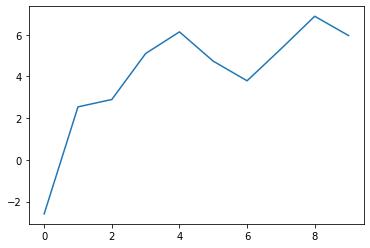

In [82]:
plt.plot(y)

In [ ]:
model = SymbolicRegressor(verbose = 1, population_size = 5000, parsimony_coefficient=0.01,
                          function_set=('add', 'sub', 'mul', 'sin', 'cos', 'log', 'abs'))

model.fit(x, y)

In [84]:
print(model._program)

add(add(add(log(X0), cos(-0.036)), sin(X0)), cos(X0))


In [ ]:
add(add(add(log(X0), cos(-0.036)), sin(X0)), cos(X0))

In [90]:
x_ = np.linspace(10, 20, 100)
y_ = np.sin(x_) + 1 + np.cos(np.abs(x_)) + np.log(x_)
x_ = x_.reshape(-1, 1)

In [91]:
prediction = model.predict(x_)

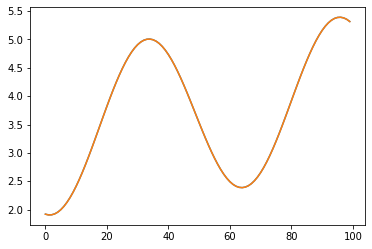

In [93]:
plt.plot(y_)
plt.plot(prediction)

# Rieman's data

In [145]:
#%% Generate X data points
def genX(lmin=0,lmax=10,npoints=29):
    x1 = np.linspace(lmin,lmax,npoints)
    x2 = np.linspace(lmin,lmax,npoints)
    X1,X2 = np.meshgrid(x1,x2)
    x1m = np.ravel(X1.T)
    x2m = np.ravel(X2.T)
    Xm = np.c_[x1m,x2m]
    return Xm

In [146]:
#%% Test function 3
def testfunction3(X,noise=False):
    # Modelo: Y = sin(sqrt(x1^2+x2^2))/sqrt(x1^2+x2^2)+10
    X1 = X[:,0]
    X2 = X[:,1]
    if noise:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)+(0.5*np.random.rand(X.shape[0])-0.25)
    else:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)
    
    y = np.ravel(Y.T)
    return y

In [147]:
def square(x):
    return np.square(x)

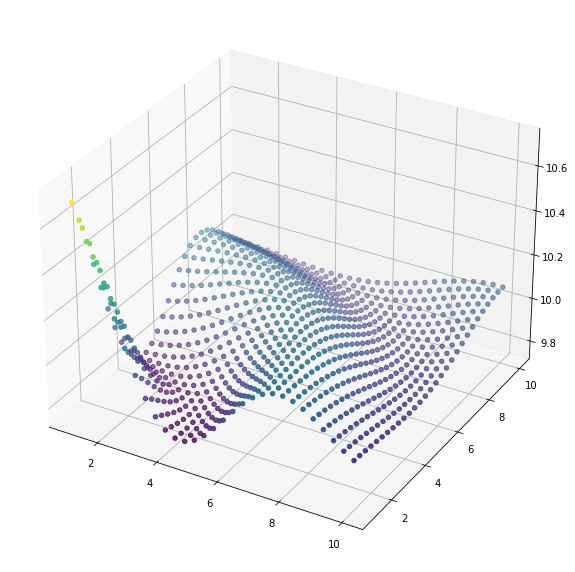

In [148]:
#%% Generacion de un hyperplano
#np.random.seed(1)
lmin = 1
lmax = 10
n = 29
Xm = genX(lmin=lmin,lmax=lmax,npoints=n)
y = testfunction3(X=Xm,noise=False)

nsamples=Xm.shape[0]

#%% Visualizar los datos
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm[:,0],Xm[:,1], y, c=y)
plt.show()

In [98]:
?SymbolicRegressor

In [ ]:
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.1, p_point_mutation=0.1, 
                           const_range = (-1, 10), parsimony_coefficient=0.001

In [150]:
square = make_function(function = square,
              name = "square", 
              arity = 1)

In [199]:
est_gp = SymbolicRegressor(population_size=10000, init_method = "full", 
                           p_crossover=0.7, p_subtree_mutation = 0.2, 
                           const_range = (-10, 10), warm_start = True,
                           function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'sqrt'), 
                           generations=30, stopping_criteria=0.04, parsimony_coefficient=0.0001,
                           max_samples = 0.95,
                           verbose=1, random_state=0)
est_gp.fit(Xm, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    18.92          235.119       12          0.10877         0.104732      6.98m
   1    16.41          11.7445        7        0.0899888        0.0811373      6.87m
   2    16.73          9.66526        6        0.0894736        0.0860106      6.74m
   3    19.07          9.60269        7        0.0887748         0.103668      6.59m
   4    16.42          9.18648       10        0.0879242         0.125675      6.76m
   5    12.45          7.49301       24        0.0865207        0.0887982      5.57m
   6    12.90          6.45106       24        0.0861173        0.0839674      5.45m
   7    11.27          4.75604       30        0.0856008         0.110971      5.14m
   8    10.52          5.65029       36        0.0839849         0.095109  

SymbolicRegressor(const_range=(-10, 10), feature_names=None,
                  function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos',
                                'sqrt'),
                  generations=30, init_depth=(2, 6), init_method='full',
                  low_memory=False, max_samples=0.95,
                  metric='mean absolute error', n_jobs=1, p_crossover=0.7,
                  p_hoist_mutation=0.01, p_point_mutation=0.01,
                  p_point_replace=0.05, p_subtree_mutation=0.2,
                  parsimony_coefficient=0.0001, population_size=10000,
                  random_state=0, stopping_criteria=0.04, tournament_size=20,
                  verbose=1, warm_start=True)

In [200]:
print(est_gp._program)

add(sub(add(4.811, 5.883), div(5.294, 7.544)), div(div(cos(add(add(cos(sin(X1)), mul(div(X0, X1), div(X0, -3.790))), sub(div(sub(X1, 0.412), add(X0, X1)), X1))), sqrt(div(5.294, 7.544))), add(X0, X1)))


In [201]:
predict = est_gp.predict(Xm)

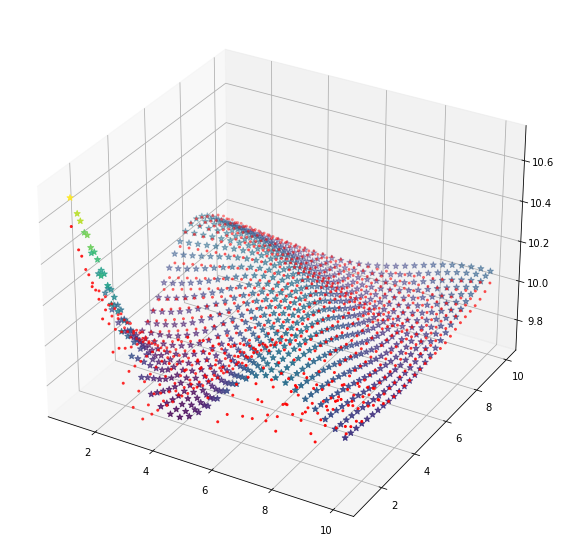

In [206]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm[:,0],Xm[:,1], y, c=y,s=40, marker = '*')
ax.scatter(Xm[:,0],Xm[:,1], predict, c='r',s=4)
#ax.view_init(30, 0)
plt.show()

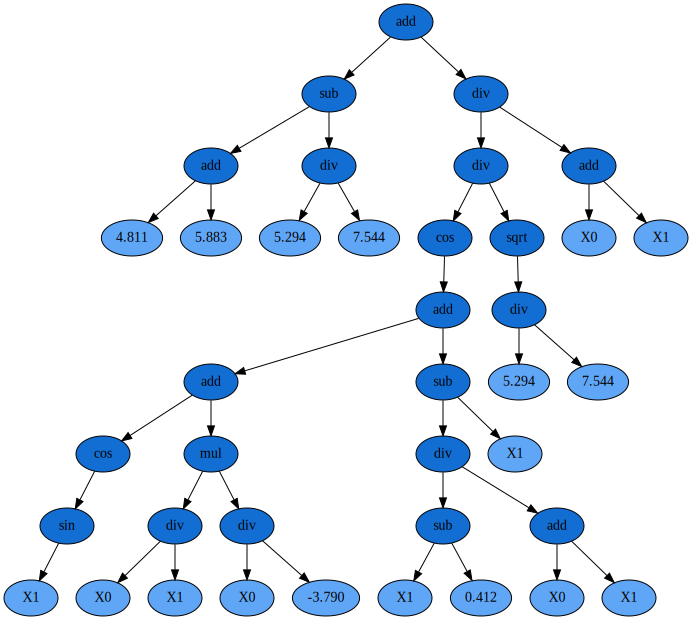

In [204]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

# CENACE

## load data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
path_consumo = Path().resolve().parents[1] / "Data" / "Data1.xlsx"
consumo = pd.read_excel(path_consumo)
consumo = consumo.set_index("fecha").loc["2007-01-01":"2020-03-30"]
X_path = Path().resolve().parents[1] / "Data" / "X_gp.csv"
X = pd.read_csv(X_path).set_index("fecha")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, consumo, test_size = 365, shuffle = False)
y_train = y_train.to_numpy().reshape(-1)

In [16]:
# custom metric
def _mape(y, y_pred, w):
    diffs = np.abs(np.divide((np.maximum(0.001, y) - np.maximum(0.001, y_pred)),np.maximum(0.001, y)))
    
    return 100. * np.average(diffs, weights=w)

mape = make_fitness(_mape, greater_is_better=False)

## fit

In [19]:
model = SymbolicRegressor(population_size=20000, init_method = "half and half", metric=mape,
                           p_crossover=0.7, p_subtree_mutation = 0.22, p_hoist_mutation = 0.05,
                           const_range = (-10, 10), warm_start = True, feature_names = [*X.columns],
                           function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'sqrt', 'abs'), 
                           generations=50, stopping_criteria=4, parsimony_coefficient=0.0003,
                           max_samples = 0.95,
                           verbose=1, random_state=0)


In [ ]:
model.fit(X_train, y_train)

with open('gp_model_CENACE[07-19]_normalized.pkl', 'wb') as f:
    pickle.dump(model, f)

In [16]:
lspi = "mul(abs(abs(add(cos(mul(abs(sqrt(sqrt(add(add(div(abs(X15), cos(X11)), mul(6.405, -6.457)), mul(6.405, mul(6.405, -6.457)))))), add(X4, X4))), mul(6.405, -6.457)))), mul(abs(abs(mul(add(add(abs(add(X6, X0)), abs(-9.491)), mul(abs(sqrt(sqrt(mul(abs(sqrt(sqrt(abs(sqrt(abs(abs(mul(add(abs(add(add(mul(abs(sqrt(sqrt(add(add(div(abs(X15), cos(X11)), add(X6, X0)), abs(X15))))), add(X4, X4)), mul(mul(X14, X17), sub(X0, X6))), abs(-9.491))), abs(X0)), abs(mul(6.405, -6.457)))))))))), add(X4, X4))))), sub(X0, X6))), abs(mul(6.405, -6.457))))), add(abs(sub(sin(X7), add(X16, -9.009))), mul(X0, sub(cos(X11), sin(sin(mul(mul(X1, X16), add(add(mul(X1, X16), abs(mul(sqrt(mul(abs(sqrt(add(cos(sin(mul(mul(X1, X16), add(add(mul(mul(X16, X10), add(X2, X14)), abs(mul(abs(add(cos(cos(X12)), sqrt(X4))), X17))), add(abs(abs(mul(6.405, -6.457))), abs(-9.491)))))), mul(6.405, -6.457)))), add(X4, X4))), X17))), add(abs(abs(mul(6.405, -6.457))), abs(-9.491)))))))))))"

In [31]:
trans_lspi = lspi.replace("mul", "np.multiply").replace("add", "np.add").replace("sub", "np.substract")\
.replace("div", "np.divide").replace("abs", "np.abs").replace("cos", "np.cos").replace("sin", "np.sin")\
.replace("sqrt", "np.sqrt")

# CENACE normalized

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
path_consumo = Path().resolve().parent / "Data" / "Data1.xlsx"
consumo = pd.read_excel(path_consumo)
consumo = consumo.set_index("fecha").loc["2007-01-01":"2020-03-30"]
X_path = Path().resolve().parent / "Data" / "X_gp.csv"
X = pd.read_csv(X_path).set_index("fecha")

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, consumo, test_size = 365, shuffle = False)

scaler = MaxAbsScaler(); scaler.fit(X_train); X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler1 = MaxAbsScaler(); scaler1.fit(y_train)
y_train = scaler1.transform(y_train).reshape(-1); y_test = scaler1.transform(y_test).reshape(-1)

In [64]:
# custom metric
def _mape(y, y_pred, w):
    diffs = np.abs(np.divide((np.maximum(0.001, y) - np.maximum(0.001, y_pred)),np.maximum(0.001, y)))
    
    return 100. * np.average(diffs, weights=w)

mape = make_fitness(_mape, greater_is_better=False)

## fit

In [65]:
model = SymbolicRegressor(population_size=20000, init_method = "half and half", metric=mape,
                           p_crossover=0.7, p_subtree_mutation = 0.22, p_hoist_mutation = 0.05,
                           const_range = (-10, 10), warm_start = False, feature_names = [*X.columns],
                           function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'sqrt', 'abs'), 
                           generations=50, stopping_criteria=3, parsimony_coefficient=0.0003,
                           max_samples = 0.95,
                           verbose=1, random_state=0)


In [66]:
model.fit(X_train, y_train)

# with open('gp_model_CENACE[07-19]_normalized.pkl', 'wb') as f:
#     pickle.dump(model, f)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.79           149.16        4          7.31771          7.34778     31.29m
   1     5.95          37.9688       21          5.82998          6.39887     30.70m
   2     5.08           29.201       21          5.81106          6.12769     32.70m
   3     5.82          24.6472       24          5.73109          6.02861     33.24m
   4     8.95          20.0255       17          5.68534          5.98357     34.17m
   5    11.40          17.5033       16           5.6338          5.71489     36.66m
   6    18.08          15.9196       32          5.58103          5.97223     39.66m
   7    29.37          14.7523       27          5.42588          5.27897     47.08m
   8    33.21          13.5659       39          5.31666          6.65119  

SymbolicRegressor(const_range=(-10, 10),
                  feature_names=['num', 'day', 'month', 'mín', 'max',
                                 'Nubosidad', 'Invierno1', 'Primavera',
                                 'verano', 'Otoño', 'Otoño2', 'Invierno2',
                                 'calor1', 'calor2', 'frio1', 'frio2', 'fin',
                                 'entre'],
                  function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos',
                                'sqrt', 'abs'),
                  generations=50, init_depth=(2, 6),
                  init_method='half and half', low_memory=False,
                  max_samples=0.95,
                  metric=<gplearn.fitness._Fitness object at 0x00000194746A6588>,
                  n_jobs=1, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.01, p_point_replace=0.05,
                  p_subtree_mutation=0.22, parsimony_coefficient=0.0003,
                  population_size=20000, random_state=0, st

In [67]:
with open('gp_model_CENACE[07-19]_normalized.pkl', 'wb') as f:
    pickle.dump(model, f)

In [68]:
print(model._program)

cos(cos(sqrt(mul(cos(div(cos(abs(Primavera)), add(sin(cos(day)), abs(num)))), sqrt(mul(mul(mul(mul(div(sin(max), cos(sqrt(mul(mul(mul(mul(div(div(sin(max), sqrt(cos(max))), sqrt(abs(Nubosidad))), sqrt(num)), sin(add(sin(div(sqrt(sin(mín)), add(sin(calor2), abs(num)))), cos(max)))), sin(sub(7.973, fin))), cos(sub(sqrt(sqrt(mul(mul(sub(abs(sqrt(mul(cos(max), sin(sqrt(sin(mín)))))), sin(num)), sqrt(num)), sin(sub(7.973, mul(sqrt(calor2), sqrt(calor2))))))), sqrt(num))))))), sqrt(num)), sin(add(mul(day, add(day, div(cos(mín), sin(max)))), mín))), cos(mul(Invierno2, cos(add(Otoño2, calor2))))), cos(mul(cos(sin(max)), add(Otoño2, calor2)))))))))


In [69]:
y_pred = model.predict(X_test)
y_pred = scaler1.inverse_transform(y_pred.reshape(-1, 1))

In [72]:
y_test = scaler1.inverse_transform(y_test.reshape(-1, 1))

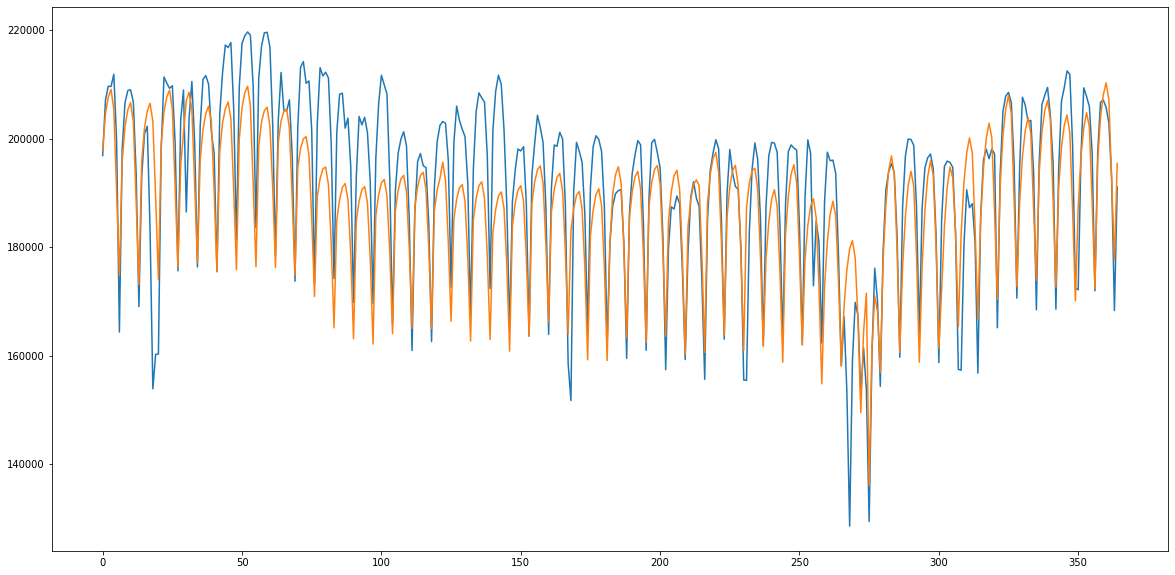

In [73]:
plt.figure(figsize = (20, 10))
plt.plot(y_test)
plt.plot(y_pred)